In [1]:
print("Nguyễn Nguyên Huy - 6351071030")

Nguyễn Nguyên Huy - 6351071030


In [25]:
#import thư viện
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Kích thước tập huấn luyện (Train images): (60000, 28, 28)
Kích thước nhãn huấn luyện (Train labels): (60000,)
----------------------------------------
Kích thước tập kiểm thử (Test images): (10000, 28, 28)
Kích thước nhãn kiểm thử (Test labels): (10000,)

--- Hình ảnh mẫu đầu tiên trong tập Train ---


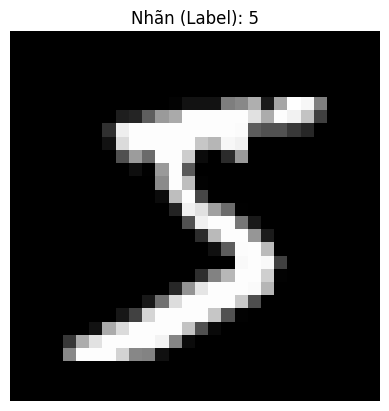

In [5]:
'''
a) Đọc	bộ	dữ	liệu	train,	test	của	MNIST	từ	Keras
Hướng	dẫn:	Từ	thư	viện	Kerast import	MNIST và	sử	dụng	hàm	load_data để	đọc
bộ	dữ	liệu và	ghi	vào	(train_images,	train_labels),	(test_images,	test_labels)
'''
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

print("Kích thước tập huấn luyện (Train images):", train_images.shape)
print("Kích thước nhãn huấn luyện (Train labels):", train_labels.shape)
print("-" * 40)
print("Kích thước tập kiểm thử (Test images):", test_images.shape)
print("Kích thước nhãn kiểm thử (Test labels):", test_labels.shape)

# Hiển thị thử 1 hình ảnh đầu
print("\n--- Hình ảnh mẫu đầu tiên trong tập Train ---")
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Nhãn (Label): {train_labels[0]}")
plt.axis('off')
plt.show()

In [6]:
'''
b) In	ra	kích	thước	của	tập	train,	test:
Hướng	dẫn:	Sử	dụng	shape
'''
print("--- Tập huấn luyện (Train) ---")
print("Kích thước train_images:", train_images.shape)
print("Kích thước train_labels:", train_labels.shape)

# In ra kích thước của tập kiểm thử (Test)
print("\n--- Tập kiểm thử (Test) ---")
print("Kích thước test_images:", test_images.shape)
print("Kích thước test_labels:", test_labels.shape)

--- Tập huấn luyện (Train) ---
Kích thước train_images: (60000, 28, 28)
Kích thước train_labels: (60000,)

--- Tập kiểm thử (Test) ---
Kích thước test_images: (10000, 28, 28)
Kích thước test_labels: (10000,)


In [8]:
'''
c) Chuẩn	hóa	các	giá	trị pixel	của	ảnh	về	đoạn	[0,1]
Hướng	dẫn:	Chia	255.0
'''
train_images = train_images / 255.0
test_images = test_images / 255.0

# --- Kiểm tra kết quả ---
print("Đã hoàn tất chuẩn hóa!")
print(f"Giá trị lớn nhất trong tập train (Max): {train_images.max()}")
print(f"Giá trị nhỏ nhất trong tập train (Min): {train_images.min()}")

# Kiểm tra thử một điểm ảnh
print(f"Giá trị một pixel mẫu: {train_images[0][14][14]}")

Đã hoàn tất chuẩn hóa!
Giá trị lớn nhất trong tập train (Max): 0.00392156862745098
Giá trị nhỏ nhất trong tập train (Min): 0.0
Giá trị một pixel mẫu: 0.003690888119953864


In [10]:
'''
d) Chia	tập	train ban	đầu	thành	tập	train	và	tập	validaion theo	tỷ	lệ	8:2
Hướng	dẫn:	Sử	dụng	train_test_split từ	 thư	viện	 sklearn	để	chia	train_images,
train_labels thành	 chia	 train_images,	 train_labels,	 validation_images,
validation_labels
In	shape	của	các	trập	train	và	validation.
'''
train_images, validation_images, train_labels, validation_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)

#  In ra kích thước (shape) của các tập sau khi chia
print("--- KÍCH THƯỚC SAU KHI CHIA (Từ 60.000 mẫu gốc) ---")

print("1. Tập Train mới (80%):")
print(f"   - Images: {train_images.shape}")
print(f"   - Labels: {train_labels.shape}")

print("\n2. Tập Validation (20%):")
print(f"   - Images: {validation_images.shape}")
print(f"   - Labels: {validation_labels.shape}")

--- KÍCH THƯỚC SAU KHI CHIA (Từ 60.000 mẫu gốc) ---
1. Tập Train mới (80%):
   - Images: (48000, 28, 28)
   - Labels: (48000,)

2. Tập Validation (20%):
   - Images: (12000, 28, 28)
   - Labels: (12000,)


In [12]:
'''
e) Xây	dựng	Neural	Network	gồm các layers:
o Flatten	layer:	Làm	phẳng,	chuyển	đổi	dữ	liệu	 từ	định	dạng	2D	 (28x28
pixel)	thành vector	1D	(784	chiều)
o Dense layer:	Gồm	128	neural,	sử	dụng	hàm	kích	hoạt	Relu	và	các	neural
được	kết	nối	đầy	đủ	với	các	neural	ở	lớp	trước	đó	(Fully	connected)
o Drop	 out	layer:	ngẫu	 nhiên	 "tắt"	một	 số	 neuron	trong	 quá	 trình	 huấn
luyện,	nhằm	giảm	thiểu	hiện	tượng	overfitting.	Mỗi	neuron	sẽ	có	xác	suất
20% để	bị	tắt.
o Dense layer:	Gồm	số	lượng	neural	là	số	class	cần	phân	lớp,	sử	dụng	hàm
kích	hoạt	Softmax	để	tính	xác	suất	của	từng	class	và	các	neural	được	kết
nối	đầy	đủ	(Fully	connected).
Hướng	dẫn:	Sử	dụng Sequential, Flatten,	Dense,	Dropout từ	thư	viện	Keras	với
TensorFlow	backend.
'''
model_mnist = Sequential()

model_mnist.add(Flatten(input_shape=(28, 28)))

model_mnist.add(Dense(128, activation='relu'))

model_mnist.add(Dropout(0.2))

model_mnist.add(Dense(10, activation='softmax'))

model_mnist.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
'''
f) Biên	 dịch	 mô	 hình	 sử	 dụng optimizer: adam;	 loss:
sparse_categorical_crossentropy;	metric: accuracy
Hướng	dẫn:	Sử	dụng	compile
'''
model_mnist.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy'])

print("Đã biên dịch mô hình thành công! Sẵn sàng để train.")

Đã biên dịch mô hình thành công! Sẵn sàng để train.


In [14]:
'''
g) Huấn	 luyện	 mô	 hình	 dựa	 trên	 tập	 train,	 đánh	 giá	 với	 tập	 validation;
epoch: 5;	batch_size:	32.
Hướng	dẫn:	Sử	dụng	fit
'''
print("Bắt đầu quá trình huấn luyện...")
history = model_mnist.fit(train_images, train_labels,
                          epochs=5,
                          batch_size=32,
                          validation_data=(validation_images, validation_labels))

print("\nĐã huấn luyện xong!")

Bắt đầu quá trình huấn luyện...
Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5172 - loss: 1.8277 - val_accuracy: 0.8217 - val_loss: 0.7390
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8136 - loss: 0.6911 - val_accuracy: 0.8723 - val_loss: 0.4903
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8575 - loss: 0.5083 - val_accuracy: 0.8901 - val_loss: 0.4070
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8787 - loss: 0.4264 - val_accuracy: 0.8988 - val_loss: 0.3613
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8860 - loss: 0.3870 - val_accuracy: 0.9079 - val_loss: 0.3314

Đã huấn luyện xong!


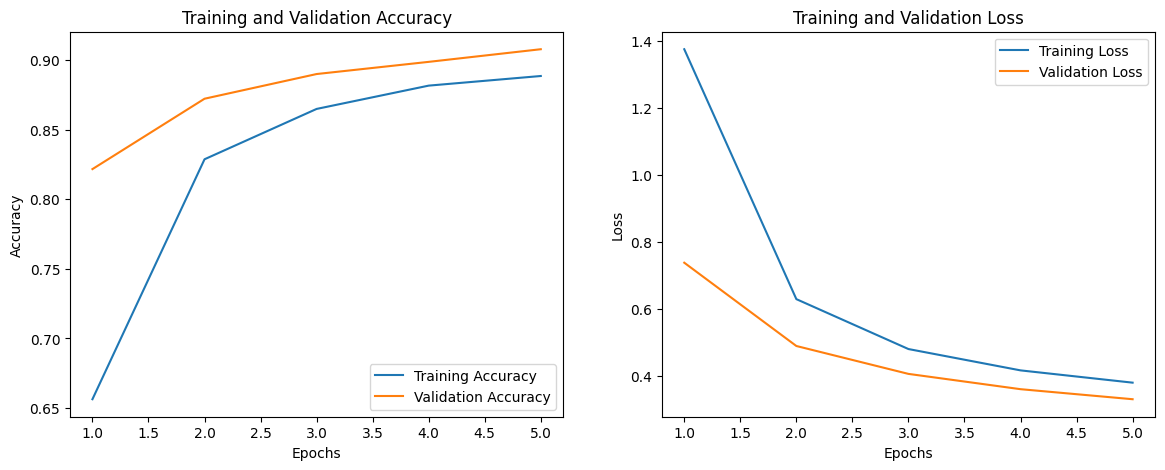

In [16]:
'''
h) Vẽ	biểu	đồ	thể	hiện	accuracy,	loss	sau	mỗi	epoch.
Hướng	dẫn:	Sử	dụng	plot	trong	matplotlib
'''
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Tạo mảng số epoch (từ 1 đến 5)
epochs_range = range(1, len(acc) + 1)

# 2. Vẽ biểu đồ
plt.figure(figsize=(14, 5))

# --- Biểu đồ 1: Accuracy (Độ chính xác) ---
plt.subplot(1, 2, 1) # 1 hàng, 2 cột, hình thứ 1
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# --- Biểu đồ 2: Loss (Độ mất mát) ---
plt.subplot(1, 2, 2) # 1 hàng, 2 cột, hình thứ 2
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()

In [18]:
'''
i) Dự	đoán	phân lớp	cho	tập	test
Hướng	dẫn:	sử	dụng	predict	để	dự	đoán	xác	suất	cho	mỗi	mẫu	và	mỗi	class.	Sử
dụng	argmax	của	thư	viện	numpy	để	chọn	ra	class	có	xác	suất	lớn	nhất	của	từng
mẫu	dữ	liệu.
'''
print("Đang thực hiện dự đoán...")
y_pred_probs = model_mnist.predict(test_images)

y_pred_labels = np.argmax(y_pred_probs, axis=1)

# --- Kiểm tra kết quả ---
print("\nĐã dự đoán xong!")
print(f"Kích thước kết quả dự đoán: {y_pred_labels.shape}") # Phải là (10000,)

# So sánh thử 10 kết quả đầu tiên
print("\n--- So sánh 10 mẫu đầu tiên ---")
print(f"Dự đoán của máy: {y_pred_labels[:10]}")
print(f"Đáp án thực tế : {test_labels[:10]}")

Đang thực hiện dự đoán...
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 879us/step

Đã dự đoán xong!
Kích thước kết quả dự đoán: (10000,)

--- So sánh 10 mẫu đầu tiên ---
Dự đoán của máy: [7 2 1 0 4 1 4 9 6 9]
Đáp án thực tế : [7 2 1 0 4 1 4 9 5 9]


In [22]:
'''
j) Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test
'''
acc_mnist = accuracy_score(test_labels, y_pred_labels)

# In kết quả
print(f"Độ chính xác (Accuracy) trên tập test: {acc_mnist:.4f}")
print(f"-> Tương đương: {acc_mnist * 100:.2f}%")

Độ chính xác (Accuracy) trên tập test: 0.9097
-> Tương đương: 90.97%


In [24]:
'''
k) Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của
mô	hình	trên	tập	test
'''
target_names = [f"Chữ số {i}" for i in range(10)]

#  In báo cáo phân loại
print("--- BÁO CÁO PHÂN LOẠI CHI TIẾT (MNIST) ---")

report = classification_report(test_labels, y_pred_labels, target_names=target_names, digits=4)

print(report)

--- BÁO CÁO PHÂN LOẠI CHI TIẾT (MNIST) ---
              precision    recall  f1-score   support

    Chữ số 0     0.9275    0.9796    0.9529       980
    Chữ số 1     0.9422    0.9762    0.9589      1135
    Chữ số 2     0.9261    0.8740    0.8993      1032
    Chữ số 3     0.8848    0.8970    0.8909      1010
    Chữ số 4     0.8928    0.9409    0.9162       982
    Chữ số 5     0.8897    0.8408    0.8646       892
    Chữ số 6     0.9278    0.9395    0.9336       958
    Chữ số 7     0.9244    0.9037    0.9139      1028
    Chữ số 8     0.8757    0.8532    0.8643       974
    Chữ số 9     0.8969    0.8791    0.8879      1009

    accuracy                         0.9097     10000
   macro avg     0.9088    0.9084    0.9082     10000
weighted avg     0.9095    0.9097    0.9092     10000



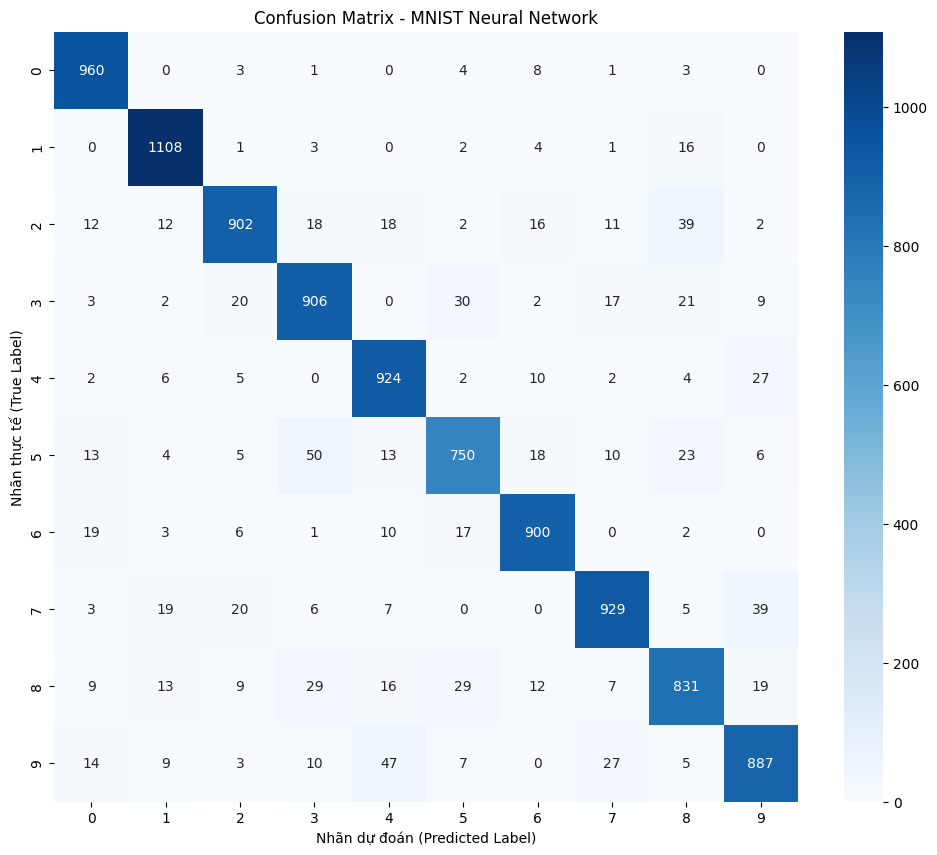

In [26]:
'''
l) Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)
'''
cm_mnist = confusion_matrix(test_labels, y_pred_labels)

# Vẽ Heatmap
plt.figure(figsize=(12, 10))

sns.heatmap(cm_mnist, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(10),
            yticklabels=range(10))

plt.xlabel('Nhãn dự đoán (Predicted Label)')
plt.ylabel('Nhãn thực tế (True Label)')
plt.title('Confusion Matrix - MNIST Neural Network')
plt.show()

--- KẾT QUẢ DỰ ĐOÁN 05 ẢNH ĐẦU TIÊN TRONG TẬP TEST ---


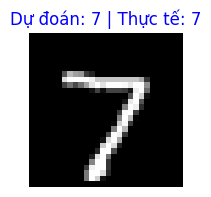

------------------------------


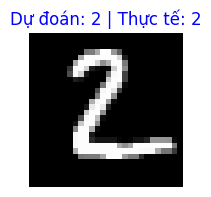

------------------------------


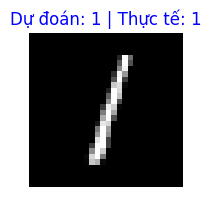

------------------------------


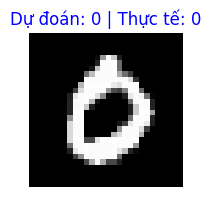

------------------------------


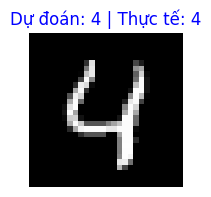

------------------------------


In [27]:
'''
m)In	ra	kết	quả	phân	lớp	của	05	ảnh	đầu	tiên	trong	tập	test
Hướng	dẫn:
Chạy	image	index	trong	range(5)	để	phân	lớp	05	ảnh	đầu	tiên	trong	tập	test.
Sử	dụng	expand_dims	trong	numpy	để	lấy	ảnh	từ	tập	test.
Sử	dụng	predict,	argmax	để	phân	lớp.
Sử	dụng	plot	trong	matplotlib	để	hiển	thị	ảnh.
'''
print("--- KẾT QUẢ DỰ ĐOÁN 05 ẢNH ĐẦU TIÊN TRONG TẬP TEST ---")

# Chạy vòng lặp qua 5 chỉ số đầu tiên (0, 1, 2, 3, 4)
for i in range(5):
    # Lấy ảnh và nhãn thực tế
    image = test_images[i]
    true_label = test_labels[i]

    # Xử lý kích thước ảnh để đưa vào mô hình
    image_batch = np.expand_dims(image, axis=0)

    # Dự đoán
    pred_prob = model_mnist.predict(image_batch, verbose=0)
    pred_label = np.argmax(pred_prob)

    # Hiển thị ảnh và kết quả
    plt.figure(figsize=(2, 2)) # Kích thước ảnh nhỏ gọn
    plt.imshow(image, cmap='gray') # Hiển thị đen trắng

    # Đổi màu tiêu đề: Xanh nếu đúng, Đỏ nếu sai
    color = 'blue' if pred_label == true_label else 'red'
    plt.title(f"Dự đoán: {pred_label} | Thực tế: {true_label}", color=color)
    plt.axis('off') # Tắt trục tọa độ
    plt.show()
    print("-" * 30)

Tổng số lượng mẫu dự đoán SAI: 903 mẫu (trên tổng 10.000 mẫu)
Dưới đây là 05 trường hợp sai đầu tiên:
--------------------------------------------------


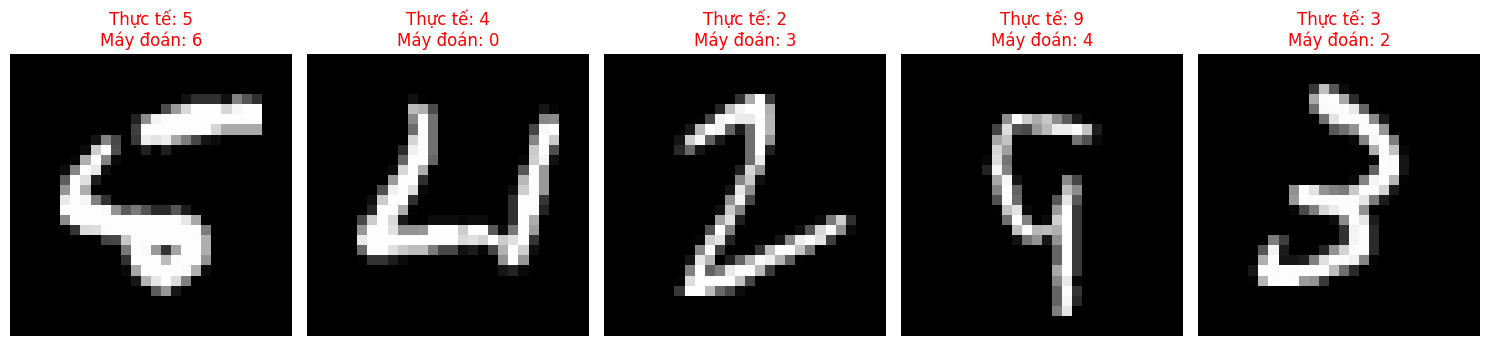

In [28]:
'''
n) In	ra	05	kết	quả	đầu	tiên	phân	lớp	sai	so	với	nhãn	thực	tế	trong	tập	test
'''
error_indices = np.where(y_pred_labels != test_labels)[0]

print(f"Tổng số lượng mẫu dự đoán SAI: {len(error_indices)} mẫu (trên tổng 10.000 mẫu)")
print("Dưới đây là 05 trường hợp sai đầu tiên:")
print("-" * 50)

# Hiển thị 5 ảnh sai đầu tiên
plt.figure(figsize=(15, 4)) # Thiết lập khung hình rộng

for i in range(5):
    # Lấy vị trí index của mẫu sai thứ i
    idx = error_indices[i]

    # Lấy dữ liệu ảnh và nhãn
    image = test_images[idx]
    true_label = test_labels[idx]
    pred_label = y_pred_labels[idx]

    # Vẽ ảnh lên subplot (1 hàng, 5 cột)
    plt.subplot(1, 5, i + 1)
    plt.imshow(image, cmap='gray')

    # Đặt tiêu đề màu đỏ để nhấn mạnh cái sai
    plt.title(f"Thực tế: {true_label}\nMáy đoán: {pred_label}", color='red', fontsize=12)
    plt.axis('off')

plt.tight_layout()
plt.show()